# MLPC 2025 Task 2: Data Exploration

## 1 Report - Task 1: Case Study

**Set up the project**:
- download the data set `MLPC2025_dataset.zip` from Moodle into your working directory (`WORKING_DIR`)
- unzip the folder
- your project structure should look like this:

```
MLPC2025_data_exploration/                 <---- start your terminal, powershell, etc. here or navigate to this folder (e.g., with `cd`)
├── MLPC2025_dataset/
|   ├── audio/
|   ├── audio_features/
|   ├──── annotations.csv
|   ├──── annotations_text_embeddings.npz
|   ├──── metadata.csv
|   ├──── metadata_keywords_embeddings.npz
|   ├──── metadata_title_embeddings.npz
|   └──── README.md
└── MLPC2025_team-observe_task-02-data-exploration_1-report_1-case-study.ipynb      <---- run this notebook
```

**Run the cell below** to check your setup.

In [2]:
import os
import math

# if you've setup your environment, importing these libraries should not throw an error
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

PATH_TO_DATASET = 'MLPC2025_dataset'

#
assert os.path.exists(PATH_TO_DATASET), "The dataset folder 'MLPC2025_dataset' does not exist; download the data set and extract its content."
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'audio')), "The folder 'MLPC2025_dataset/audio' does not exist."
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'audio_features')), "The folder 'MLPC2025_dataset/audio_featues' does not exist."
#
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'annotations.csv')), "The file 'MLPC2025_dataset/annotations.csv' does not exist."
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'metadata.csv')), "The file 'MLPC2025_dataset/metadata.csv' does not exist."
#
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'annotations_text_embeddings.npz')), "The file 'MLPC2025_dataset/annotations_text_embeddings.npz' does not exist."
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'metadata_keywords_embeddings.npz')), "The file 'MLPC2025_dataset/metadata_keywords_embeddings.npz' does not exist."
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'metadata_title_embeddings.npz')), "The file 'MLPC2025_dataset/metadata_title_embeddings.npz' does not exist."

## Python Packages used

- [Pandas](https://pandas.pydata.org/docs/) for dealing with tabular data
- [Numpy](https://numpy.org/doc/stable/) for features
- [Matplotlib](https://matplotlib.org/stable/users/index.html) for plotting
- [scikit-learn](https://scikit-learn.org/stable/user_guide.html) for Machine Learning

# Data Set (complete)

```
MLPC2025_Dataset/
├── audio/
│   ├── 14.mp3
│   ├── 156.mp3
│   ├── ...
│   ├── 790282.mp3
|   └── 790542.mp3
├── audio_features/
│   ├── 14.npz
│   ├── 156.npz
│   ├── ...
│   ├── 790282.npz
|   └── 790542.npz
├──── annotations.csv
├──── annotations_text_embeddings.npz
├──── metadata.csv
├──── metadata_keywords_embeddings.npz
├──── metadata_title_embeddings.npz
└──── README.md
```


more content next week...

## Loading the Metadata

- let's use `pd.read_csv(PATH_TO_FILE)` to load the CSV table

In [3]:
# load the metadata
metadata_df = pd.read_csv("MLPC2025_dataset/metadata.csv")
title_embeddings = np.load("MLPC2025_dataset/metadata_title_embeddings.npz")["embeddings"]
keywords_embeddings = np.load("MLPC2025_dataset/metadata_keywords_embeddings.npz")["embeddings"]
  
# load the annotations
annotations_df = pd.read_csv("MLPC2025_dataset/annotations.csv")
annotations_embeddings = np.load("MLPC2025_dataset/annotations_text_embeddings.npz")["embeddings"]
  
# load audio features
feature_filename = metadata_df.loc[0, "filename"].replace("mp3", "npz")
features = np.load(os.path.join("MLPC2025_dataset/audio_features", feature_filename))
print(list(features.keys()))
print("Shape of ZCR feature (time, n_features)", features["zerocrossingrate"].shape)
print("Shape of MFCC features (time, n_features)", features["mfcc"].shape)



['embeddings', 'melspectrogram', 'mfcc', 'mfcc_delta', 'mfcc_delta2', 'flatness', 'centroid', 'flux', 'energy', 'power', 'bandwidth', 'contrast', 'zerocrossingrate']
Shape of ZCR feature (time, n_features) (233, 1)
Shape of MFCC features (time, n_features) (233, 32)


In [4]:
list(features.keys())
features["mfcc"].shape
feature_filename

'617030.npz'

- the result is a `pd.DataFrame`
    - individual columns are `pd.Series`  
- leftmost column gives the index, to make rows uniquely identifiable
- the header gives the name of the column
- for visualization purposes
    - only the most relevant columns are selected `metadata[LIST_OF_COLUMNS_WE_RE_INTERESTED_IN]`
    - `.head(n=3)` selects the first three rows of the table

# Exploration Task

Complete MLPC2024_dataset:
```
MLPC2025_Dataset/
├── audio/
│   ├── 0.mp3
│   ├── 1.mp3
│   ├── ...
├── audio_features/
│   ├── 0.npz
│   ├── 1.npz
│   ├── ...
├── text_features/
│   ├── ...
├── keywords_features/
│   ├── ...
├── metadata.csv
└── annotations.csv
```

- more data (12k instead of 2k)
- text embeddings
- keyword embeddings 
- additional audio features

**Data exploration task will be presented next week!**

In [5]:
## clustering with PCA - not working too well

Original shape: (35826, 1024)
Reduced shape: (35826, 2)


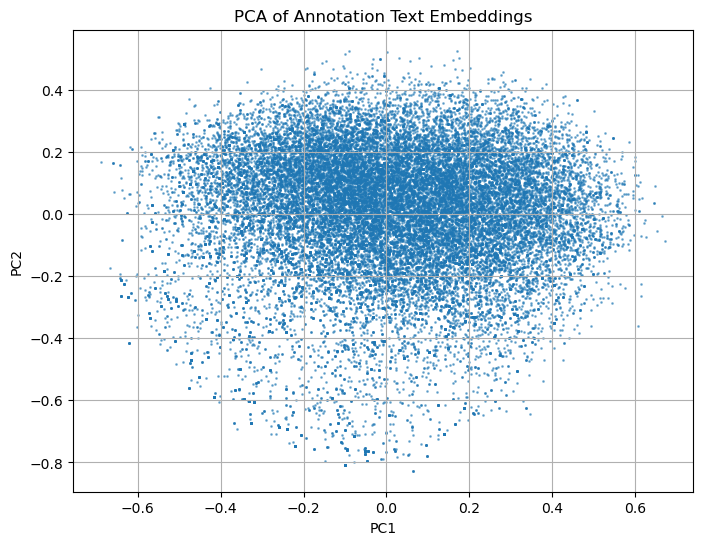

In [6]:

## PCA downprijection 

pca = PCA(n_components=2)
annotations_embeddings_pca = pca.fit_transform(annotations_embeddings)

## new shape after downprojection
print("Original shape:", annotations_embeddings.shape)
print("Reduced shape:", annotations_embeddings_pca.shape)

## Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(annotations_embeddings_pca[:,0], annotations_embeddings_pca[:,1], s=1, alpha=0.5)
plt.title('PCA of Annotation Text Embeddings')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


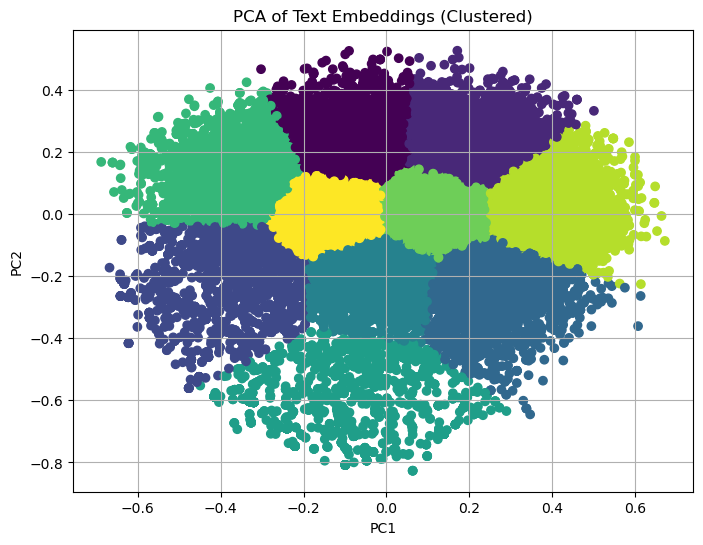

In [7]:

# Clustering K means
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(annotations_embeddings_pca)

plt.figure(figsize=(8,6))
plt.scatter(annotations_embeddings_pca[:,0], annotations_embeddings_pca[:,1], c=labels)
plt.title('PCA of Text Embeddings (Clustered)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


#### approach t-SNE -- works better

In [8]:
## Apply t-SNE
annotations_embeddings_tsne = TSNE(n_components=2, perplexity=100, random_state=42).fit_transform(annotations_embeddings)

print(annotations_embeddings_tsne.shape)

(35826, 2)


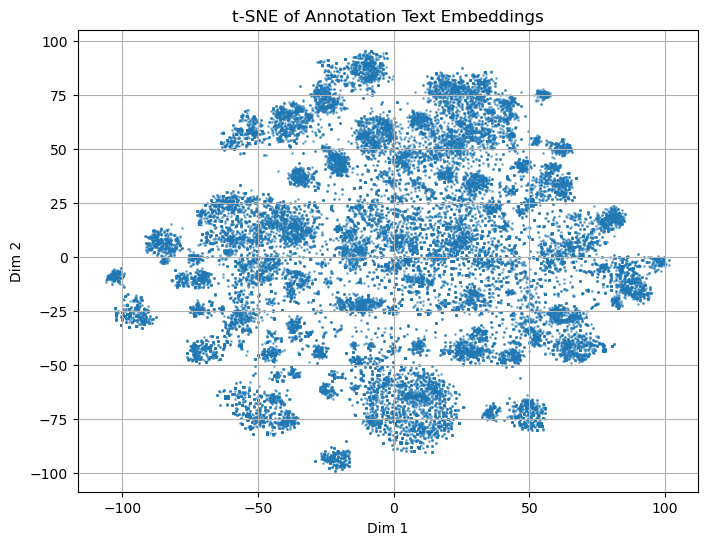

In [9]:


plt.figure(figsize=(8,6))
plt.scatter(annotations_embeddings_tsne[:,0], annotations_embeddings_tsne[:,1], s=1, alpha=0.5)
plt.title('t-SNE of Annotation Text Embeddings')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()


### check for optimal cluster count

In [10]:
def inertia_scores(data, range_clusters):
    '''
    Calculate inertia scores for a range of cluster numbers.

    :param data: data to be clustered
    :param range_clusters: range of number of clusters
    :return: list of inertia scores
    '''
    inertia_scores = []
    for i in range_clusters:
        model = KMeans(n_clusters=i)
        model.fit(data)
        inertia_scores.append(model.inertia_)
    return inertia_scores

Text(0.5, 1.0, 'Inertia scores for KMeans')

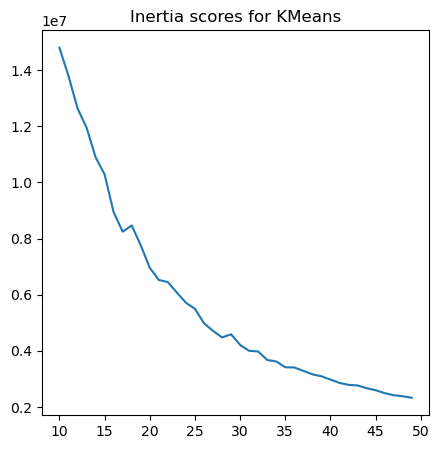

In [11]:
np.random.seed(15)
# your code goes here
range_n_clusters = list(range(10,50))
range_n_clusters
inertia = inertia_scores(annotations_embeddings_tsne, range_n_clusters)

plt.figure(figsize=(5, 5))
for i, line in enumerate([inertia]):
    plt.plot(range_n_clusters, line, label= None)

plt.title('Inertia scores for KMeans')

### assign 24 clusters

In [12]:

kmeans = KMeans(n_clusters=24, max_iter=3000, random_state=1).fit(annotations_embeddings_tsne)
clusters_assignment = kmeans.predict(annotations_embeddings_tsne)
annotations_df['cluster_assignment'] = clusters_assignment
annotations_df['cluster_assignment'].head(5)


0    10
1     2
2     3
3    12
4     7
Name: cluster_assignment, dtype: int32

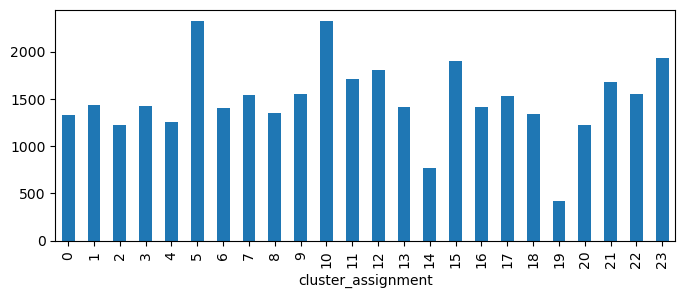

In [13]:
## sample distribution over clusters
counts = annotations_df["cluster_assignment"].value_counts(sort=False).sort_index()
counts.plot(kind="bar", figsize=(8, 3))
plt.show()

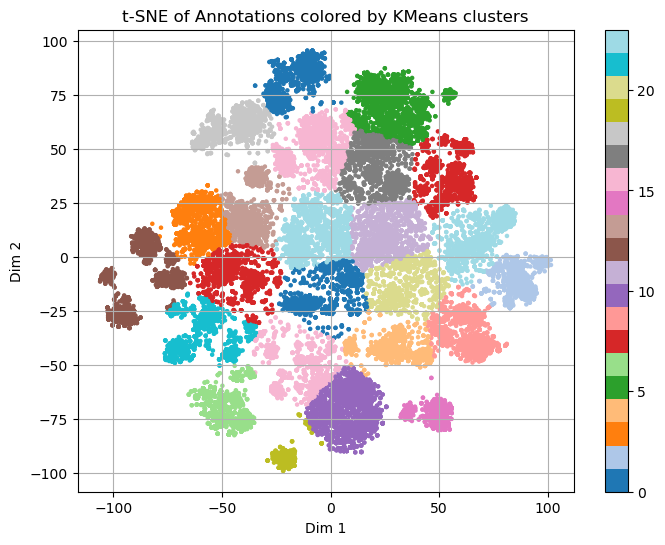

In [14]:
## 2d cluster downprojection
plt.figure(figsize=(8,6))
plt.scatter(annotations_embeddings_tsne[:,0], annotations_embeddings_tsne[:,1], c=clusters_assignment, cmap='tab20', s=5)
plt.title('t-SNE of Annotations colored by KMeans clusters')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.colorbar()
plt.grid(True)
plt.show()

### function to recognize dogs and cats

In [15]:
def is_cat(x):
    keywords = ["cat", "citten", "meow", "purr"]
    x = x.lower()
    return any([kw in x for kw in keywords])

In [16]:
def is_dog(x):
    keywords = ["dog", "bark", "puppy", 'growling']
    x = x.lower()
    return any([kw in x for kw in keywords])

In [17]:
annotations_df['cat'] = annotations_df['text'].transform(is_cat)
annotations_df['cat'].value_counts()

cat
False    34907
True       919
Name: count, dtype: int64

In [18]:
annotations_df['dog'] = annotations_df['text'].transform(is_dog)
annotations_df['dog'].value_counts()

dog
False    34103
True      1723
Name: count, dtype: int64

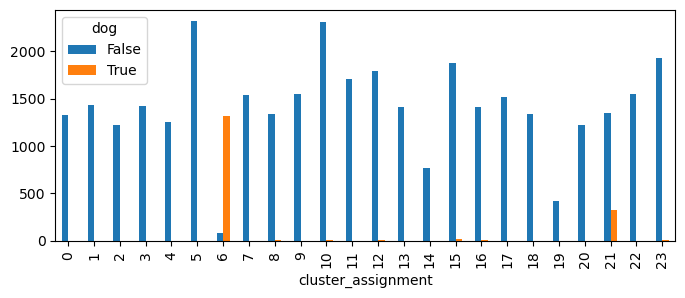

In [19]:
## clusters with dogs
counts = annotations_df[['cluster_assignment', 'dog']].groupby(['cluster_assignment', 'dog']).size().unstack()
counts.plot(kind='bar', figsize=(8, 3))
plt.show()

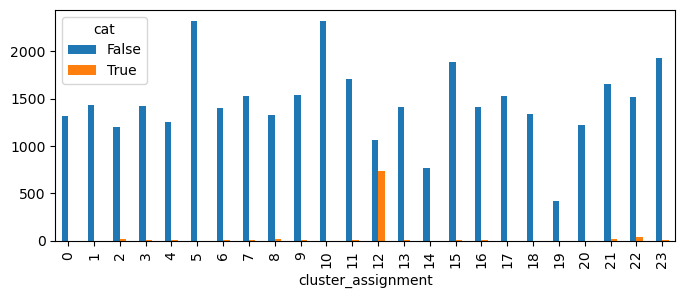

In [20]:
## clusters with cats
counts = annotations_df[['cluster_assignment', 'cat']].groupby(['cluster_assignment', 'cat']).size().unstack()
counts.plot(kind='bar', figsize=(8, 3))
plt.show()

In [21]:
annotations_df.loc[(annotations_df['cluster_assignment'] == 17) & annotations_df['dog'] == True, 'text'].head(n=10)

1767     consistent growling engine noise, becoming lou...
13081      Steady background growling of a distant motor. 
20303                            outdoors dog baking sound
Name: text, dtype: object

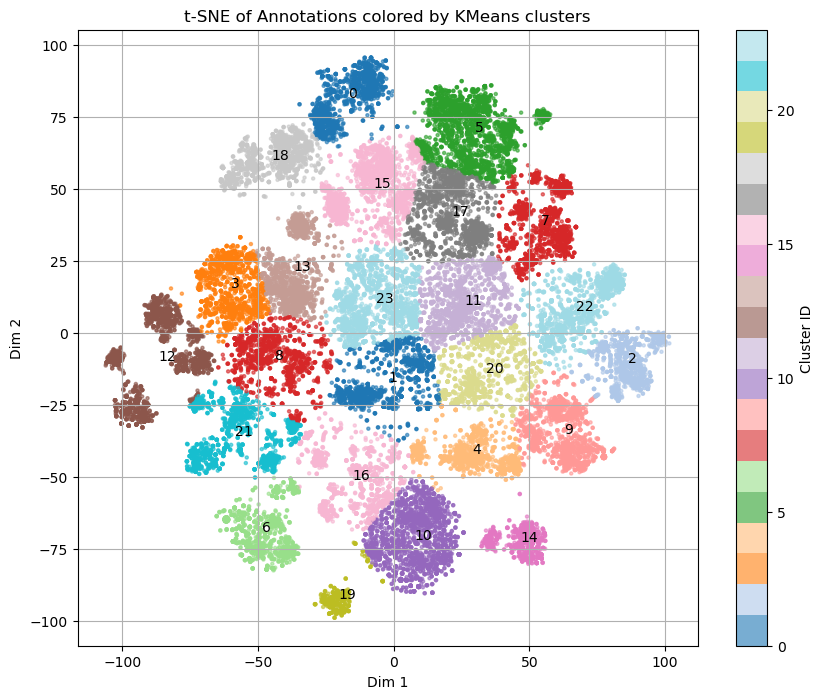

In [22]:
## 2d cluster scatter plot with numbers


plt.figure(figsize=(10,8))
plt.scatter(annotations_embeddings_tsne[:,0], annotations_embeddings_tsne[:,1], c=clusters_assignment, cmap='tab20', s=5, alpha=0.6)
plt.title('t-SNE of Annotations colored by KMeans clusters')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.colorbar(label='Cluster ID')
plt.grid(True)

## numbers
for cluster_id in np.unique(clusters_assignment):
    cluster_points = annotations_embeddings_tsne[clusters_assignment == cluster_id]
    x_center = cluster_points[:,0].mean()
    y_center = cluster_points[:,1].mean()
    plt.text(x_center, y_center, str(cluster_id))

plt.show()

In [23]:
annotations_df.loc[(annotations_df['cluster_assignment'] == 2) & annotations_df['cat'] == False, 'text'].head(n=10)

0     bird twitters nearby with a high pitch two times
1                       A cow bell clinging repeatedly
2            A child speaks with a high-pitched voice 
3               A high pitch meowing coming from a cat
4    An extremely loud brushing sound on a construc...
5                             licking and eating sound
6    A powerful cymbal crash with a bright, metalli...
7                     crowd of people howling in arena
8                                  Multiple ship horns
9    An alarm siren sounding outdoors under windy c...
Name: text, dtype: object

In [24]:
annotations_df.loc[(annotations_df['cluster_assignment'] == 18) & annotations_df['dog'] == True, 'text'].head(n=10)

35638    Soft rain falls with occasional dog barks in a...
Name: text, dtype: object

In [25]:
annotations_df.loc[(annotations_df['cluster_assignment'] == 1) & True, 'text'].head(n=20)


7                       crowd of people howling in arena
67              A shotgun cocking rhytmically very near.
209                           An electronic snare sound.
235                           An electronic snare sound.
238                           a single clapping of hands
262                                Button being clicked 
295                               rhythmic hand clapping
329    A woman shouting 'yes' loudly during applause ...
380    repetitive high-pitch slapping sound, recorded...
392                                 A short clack sound.
437                       A button being pressed quietly
454                               a bird flaps its wings
479                                                Click
484    A loud and fading overtime sound of  big amoun...
486                                       clacking sound
515    A metal door latch built on a wooden door is b...
524                  A brief, unexplained clicking sound
582                            

In [26]:
from collections import Counter

## count most common words in all clusters
cluster_top_words = {}

## ignore certain words
excluded = ["a", 'the', 'and', 'of', 'is', 'in']

for i in range(23):
    cluster_texts = annotations_df.loc[annotations_df['cluster_assignment'] == i, 'text']
    
    all_words = []
    for text in cluster_texts:
        if isinstance(text, str):
            words = text.lower().split()
            words = [w for w in words if w not in excluded]
            all_words.extend(words)
    
    word_counts = Counter(all_words)
    
    top_20_words = word_counts.most_common(10)
    

    cluster_top_words[i] = top_20_words

for i, top_words in cluster_top_words.items():
    print(f"\nCluster {i}:")
    for word, count in top_words:
        print(f"  {word}: {count}")



Cluster 0:
  water: 646
  waves: 336
  sound: 281
  splashing: 199
  wave: 189
  flowing: 183
  crashing: 135
  ocean: 125
  with: 116
  stream: 114

Cluster 1:
  sound: 330
  clapping: 308
  people: 194
  door: 124
  crowd: 113
  cheering: 105
  with: 102
  an: 96
  sound.: 82
  loud: 81

Cluster 2:
  bell: 555
  ringing: 470
  sound: 196
  with: 196
  church: 148
  metallic: 148
  wind: 129
  rings: 127
  bells: 108
  chime: 105

Cluster 3:
  man: 458
  speaking: 358
  talking: 344
  voice: 303
  woman: 246
  with: 224
  person: 177
  saying: 157
  male: 119
  an: 100

Cluster 4:
  horn: 322
  honking: 249
  car: 242
  with: 193
  sound: 165
  saxophone: 127
  train: 127
  playing: 105
  loud: 104
  loudly: 88

Cluster 5:
  engine: 831
  sound: 577
  car: 537
  by: 384
  passing: 305
  with: 295
  driving: 294
  on: 232
  an: 210
  vehicle: 208

Cluster 6:
  dog: 1087
  barking: 819
  barks: 200
  loudly: 186
  dogs: 183
  bark: 141
  repeatedly: 136
  with: 118
  distance: 99
  dis

In [32]:
annotations_df["audio_features_clusters_assignment"] = np.load('audio_features_clusters_assignment.npy')
annotations_df['audio_features_clusters_assignment'].head(5)

0     2
1    14
2     8
3    11
4    18
Name: audio_features_clusters_assignment, dtype: int32